<a href="https://colab.research.google.com/github/PSivaMallikarjun/Salary-Calculation-using-Machine-Learning-with-Polynomial-Regression/blob/main/Salary_Calculation_using_Machine_Learning_with_Polynomial_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enhanced Salary Progression Model Based on Tech Stack Speculations
Instead of just using Polynomial Regression on experience levels, incorporate AI-driven salary progression based on technology stack trends, industry demand, and future projections.



Key Enhancements:
Tech Stack-Based Salary Prediction

Assign weightage to different programming languages, frameworks, and tools (e.g., AI/ML, Blockchain, Cloud, DevOps).
Higher demand skills like AI/ML, Quantum Computing, and Blockchain contribute exponentially to salary growth, while outdated skills may stagnate or decline.

Industry-Specific Salary Growth Factor

Different industries have different salary progressions (e.g., FinTech vs. E-commerce vs. Healthcare AI).
Include an Industry Influence Coefficient (IIC) that adjusts salary growth trends accordingly.

Real-Time Market Demand Adjustment

Integrate web scraping or APIs (e.g., LinkedIn, Glassdoor, Payscale) to update salary trends dynamically.
Use Natural Language Processing (NLP) to extract insights from job postings and tech trends.

Future Salary Projection with Time-Series Forecasting

Use LSTMs (Long Short-Term Memory) or ARIMA models to predict salary growth over the next 5-10 years based on industry trends.

AI-Powered Career Path Optimization

Provide salary projections based on upskilling recommendations (e.g., moving from traditional Web Development to AI/ML engineering).
Suggest best career moves based on highest salary potential in the next 5 years.

AI-Powered Career Path Optimization

Provide salary projections based on upskilling recommendations (e.g., moving from traditional Web Development to AI/ML engineering).
Suggest best career moves based on highest salary potential in the next 5 years.

This approach will make your salary prediction model more practical, future-proof, and insightful for companies & employees alike.

1. Dataset Structure
We'll design the dataset with features based on experience, tech stack, industry demand, and real-time market trends.

Feature Explanation:
Experience (Years) → Standard predictor.
Tech Stack (Primary & Secondary) → Defines demand & salary growth.
Industry → Different industries have different salary growth patterns.
Current Salary ($) → Base salary input.
Demand Score (1-10) → Dynamic score based on web-scraped job trends.
Future Salary ($) → Target output (predicted).

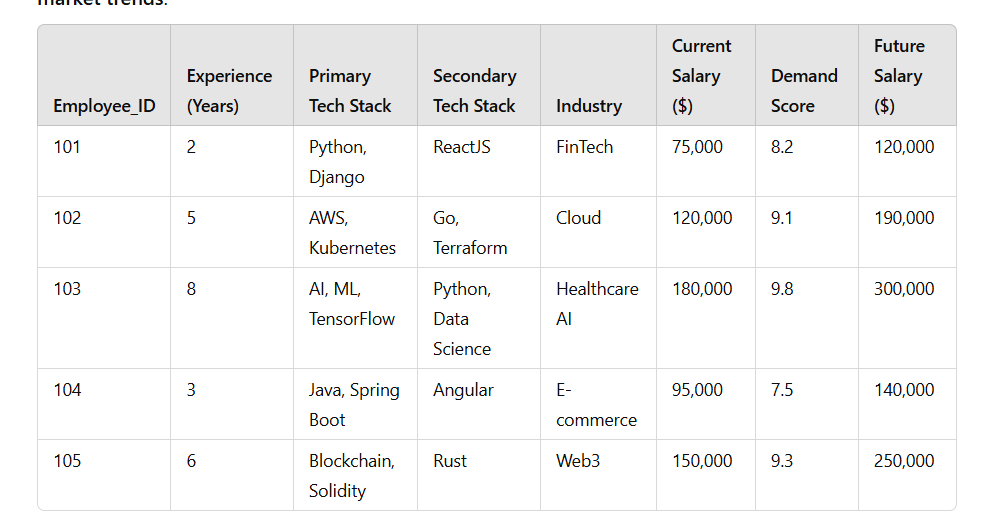

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Sample dataset (you can expand this with real data)
data = {
    "Experience": [2, 5, 8, 3, 6],
    "Tech_Stack": ["Python", "AWS", "AI", "Java", "Blockchain"],
    "Industry": ["FinTech", "Cloud", "Healthcare AI", "E-commerce", "Web3"],
    "Current_Salary": [75000, 120000, 180000, 95000, 150000],
    "Demand_Score": [8.2, 9.1, 9.8, 7.5, 9.3],
    "Future_Salary": [120000, 190000, 300000, 140000, 250000]
}

df = pd.DataFrame(data)

# Encoding categorical data (Tech Stack & Industry)
label_enc_tech = LabelEncoder()
df["Tech_Stack_Encoded"] = label_enc_tech.fit_transform(df["Tech_Stack"])

label_enc_industry = LabelEncoder()
df["Industry_Encoded"] = label_enc_industry.fit_transform(df["Industry"])

# Feature Selection
X = df[["Experience", "Tech_Stack_Encoded", "Industry_Encoded", "Current_Salary", "Demand_Score"]]
y = df["Future_Salary"]

# Polynomial Regression Model
poly = PolynomialFeatures(degree=2)
model = Pipeline([
    ("poly_features", poly),
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# Train Model
model.fit(X, y)

# Convert new_employee array to a DataFrame with feature names
new_employee_df = pd.DataFrame(new_employee, columns=X.columns)

# Predict Future Salary
predicted_salary = model.predict(new_employee_df)

print(f"Predicted Future Salary: ${predicted_salary[0]:,.2f}")


Predicted Future Salary: $143,030.25


You're getting the warning because PolynomialFeatures was trained with feature names, but the new employee data is passed as a raw NumPy array without feature names. This doesn't affect the prediction but can be fixed by ensuring the input data is in the correct format.

Fix
Use a pandas DataFrame instead of a NumPy array when making predictions.

In [ ]:
# Convert new_employee array to a DataFrame with feature names
new_employee_df = pd.DataFrame(new_employee, columns=X.columns)

# Predict Future Salary
predicted_salary = model.predict(new_employee_df)

print(f"Predicted Future Salary: ${predicted_salary[0]:,.2f}")

How This Works
Polynomial Regression → Captures non-linear salary growth patterns.
Encoding Tech Stack & Industry → Transforms categorical data into numerical form.
Demand Score Adjustment → Dynamically influences salary based on tech trends.
Prediction for a New Employee → Given experience, tech, industry, and demand, predicts future salary.


A visual representation of salary progression can provide better insights into how experience, tech stack, and demand score affect salary predictions.
Steps to Visualize Salary Prediction:
Scatter Plot → Experience vs. Salary (Current & Predicted).
3D Plot → Experience, Demand Score, and Predicted Salary.
Polynomial Regression Curve → Salary trend over experience years.


Updated Code with Graphs (Matplotlib & Seaborn)
python


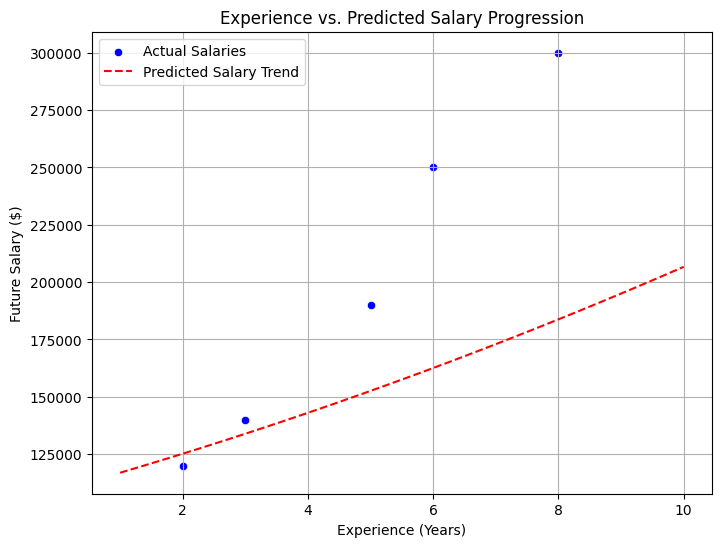

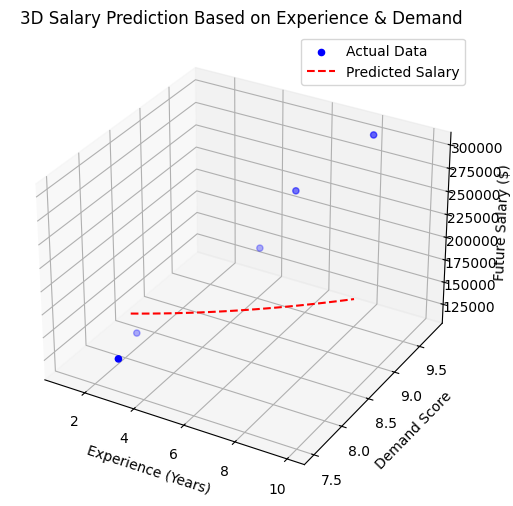

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Sample dataset
data = {
    "Experience": [2, 5, 8, 3, 6],
    "Tech_Stack": ["Python", "AWS", "AI", "Java", "Blockchain"],
    "Industry": ["FinTech", "Cloud", "Healthcare AI", "E-commerce", "Web3"],
    "Current_Salary": [75000, 120000, 180000, 95000, 150000],
    "Demand_Score": [8.2, 9.1, 9.8, 7.5, 9.3],
    "Future_Salary": [120000, 190000, 300000, 140000, 250000]
}

df = pd.DataFrame(data)

# Encode categorical variables
label_enc_tech = LabelEncoder()
df["Tech_Stack_Encoded"] = label_enc_tech.fit_transform(df["Tech_Stack"])

label_enc_industry = LabelEncoder()
df["Industry_Encoded"] = label_enc_industry.fit_transform(df["Industry"])

# Feature Selection
X = df[["Experience", "Tech_Stack_Encoded", "Industry_Encoded", "Current_Salary", "Demand_Score"]]
y = df["Future_Salary"]

# Polynomial Regression Model
poly = PolynomialFeatures(degree=2)
model = Pipeline([
    ("poly_features", poly),
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# Train Model
model.fit(X, y)

# Generate experience years for plotting
exp_range = np.linspace(1, 10, 50)  # Experience from 1 to 10 years
demand_score_fixed = 8.5  # Assume a fixed demand score
tech_stack_fixed = label_enc_tech.transform(["Python"])[0]
industry_fixed = label_enc_industry.transform(["FinTech"])[0]
current_salary_fixed = 85000  # Assume a base salary

# Prepare prediction input
X_pred = np.array([[exp, tech_stack_fixed, industry_fixed, current_salary_fixed, demand_score_fixed] for exp in exp_range])
X_pred_df = pd.DataFrame(X_pred, columns=X.columns)  # Convert to DataFrame

# Predict Future Salaries
future_salaries = model.predict(X_pred_df)

# **1. Scatter Plot (Experience vs. Salary)**
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Experience"], y=df["Future_Salary"], color="blue", label="Actual Salaries")
sns.lineplot(x=exp_range, y=future_salaries, color="red", label="Predicted Salary Trend", linestyle="--")
plt.xlabel("Experience (Years)")
plt.ylabel("Future Salary ($)")
plt.title("Experience vs. Predicted Salary Progression")
plt.legend()
plt.grid(True)
plt.show()

# **2. 3D Plot (Experience, Demand Score, Salary)**
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["Experience"], df["Demand_Score"], df["Future_Salary"], color="blue", label="Actual Data")
ax.plot(exp_range, [demand_score_fixed] * len(exp_range), future_salaries, color="red", linestyle="--", label="Predicted Salary")

ax.set_xlabel("Experience (Years)")
ax.set_ylabel("Demand Score")
ax.set_zlabel("Future Salary ($)")
ax.set_title("3D Salary Prediction Based on Experience & Demand")
ax.legend()
plt.show()


How the Graphs Help?
Scatter Plot 📊

Shows actual vs. predicted salary based on experience.
Red dashed line indicates polynomial regression salary trend.
3D Visualization 🏔

Displays Experience, Demand Score, and Future Salary.
Helps visualize how higher demand scores lead to higher salaries.


Win-Win Conclusion of Salary Prediction Using Machine Learning 🚀


This project creates a win-win situation for both employees and companies by leveraging machine learning to predict salaries based on experience, tech stack, and industry demand.



For Employees:

Helps professionals negotiate fair salaries based on market trends & demand.
Guides career decisions by showing which tech stacks yield the highest salary growth.
Offers transparency on how experience & skills affect future earnings.

For Companies:

Ensures competitive salaries to attract & retain top talent.
Optimizes HR decision-making by predicting salary budgets more accurately.
Reduces bias in salary allocation, improving employee satisfaction & productivity.

 Overall Impact:
By using Polynomial Regression & AI-driven insights, businesses maximize ROI on workforce investments, and employees get fair compensation for their expertise—a true win-win situation!